<a href="https://colab.research.google.com/github/RafsanJany-44/Thesis_Project/blob/main/Feature_Selection_Sleep_Wake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/krishnaik06/Feature-Selection-techniques/blob/master/Feature%20Selection.ipynb

https://www.youtube.com/watch?v=EqLBAmtKMnQ

In [12]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("/content/S_W.csv")
X = data.iloc[:,1:76] #independent columns
y = data[['Sleep Stage']]   #target column 

In [13]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [14]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [15]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [16]:
featureScores

,Specs,Score
0,MeanP_Alpha_F4,76.428214
1,MedianF_Alpha_F4,475.306166
2,MeanF_Alpha_F4,2168.632016
3,Spectral Edge_Alpha_F4,2715.431358
4,PeakF_Alpha_F4,4.892456
...,...,...
70,MeanP_Gamma_O2,0.009370
71,MedianF_Gamma_O2,503.504172
72,MeanF_Gamma_O2,220.842302
73,Spectral Edge_Gamma_O2,100.243386


In [17]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     Specs         Score
59           PeakF_Beta_O2  11361.831463
9            PeakF_Beta_F4   3521.642327
34           PeakF_Beta_C4   3289.529373
74          PeakF_Gamma_O2   3197.609227
3   Spectral Edge_Alpha_F4   2715.431358
8    Spectral Edge_Beta_F4   2244.876591
2           MeanF_Alpha_F4   2168.632016
24          PeakF_Gamma_F4   1858.008574
49          PeakF_Gamma_C4   1783.830026
6          MedianF_Beta_F4   1485.433996


In [19]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(featureScores.nlargest(10,'Score'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


                     Specs         Score
59           PeakF_Beta_O2  11361.831463
9            PeakF_Beta_F4   3521.642327
34           PeakF_Beta_C4   3289.529373
74          PeakF_Gamma_O2   3197.609227
3   Spectral Edge_Alpha_F4   2715.431358
8    Spectral Edge_Beta_F4   2244.876591
2           MeanF_Alpha_F4   2168.632016
24          PeakF_Gamma_F4   1858.008574
49          PeakF_Gamma_C4   1783.830026
6          MedianF_Beta_F4   1485.433996


In [20]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.00925432 0.00939905 0.01405757 0.01489145 0.0059704  0.00937696
 0.01968801 0.01628097 0.02256162 0.01257655 0.00815951 0.03561066
 0.01017431 0.0131741  0.01215612 0.00696673 0.00697128 0.0251094
 0.01807777 0.00602904 0.00841122 0.01257639 0.01067581 0.01109309
 0.00762685 0.00880683 0.00933651 0.00926522 0.01549389 0.00611267
 0.00772526 0.01664677 0.01131513 0.01493464 0.00903455 0.00831029
 0.04357617 0.01208956 0.01404533 0.02586452 0.00705    0.00692471
 0.03612418 0.02191023 0.00458903 0.00735287 0.01094023 0.00902035
 0.00850188 0.00998559 0.00866984 0.01409996 0.01198776 0.01089608
 0.00759735 0.00864524 0.01472782 0.01089278 0.00886287 0.00986758
 0.00822537 0.05160801 0.01510194 0.01768693 0.02295957 0.00684125
 0.00666644 0.03763132 0.01692398 0.00561128 0.00690462 0.01114973
 0.00769894 0.00789447 0.00902328]


In [ ]:
#plot graph of feature importances for better visualization
#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(figsize=(20,10),kind="bar")
#plt.show()
#print(featureScores.nlargest(10,'Score'))

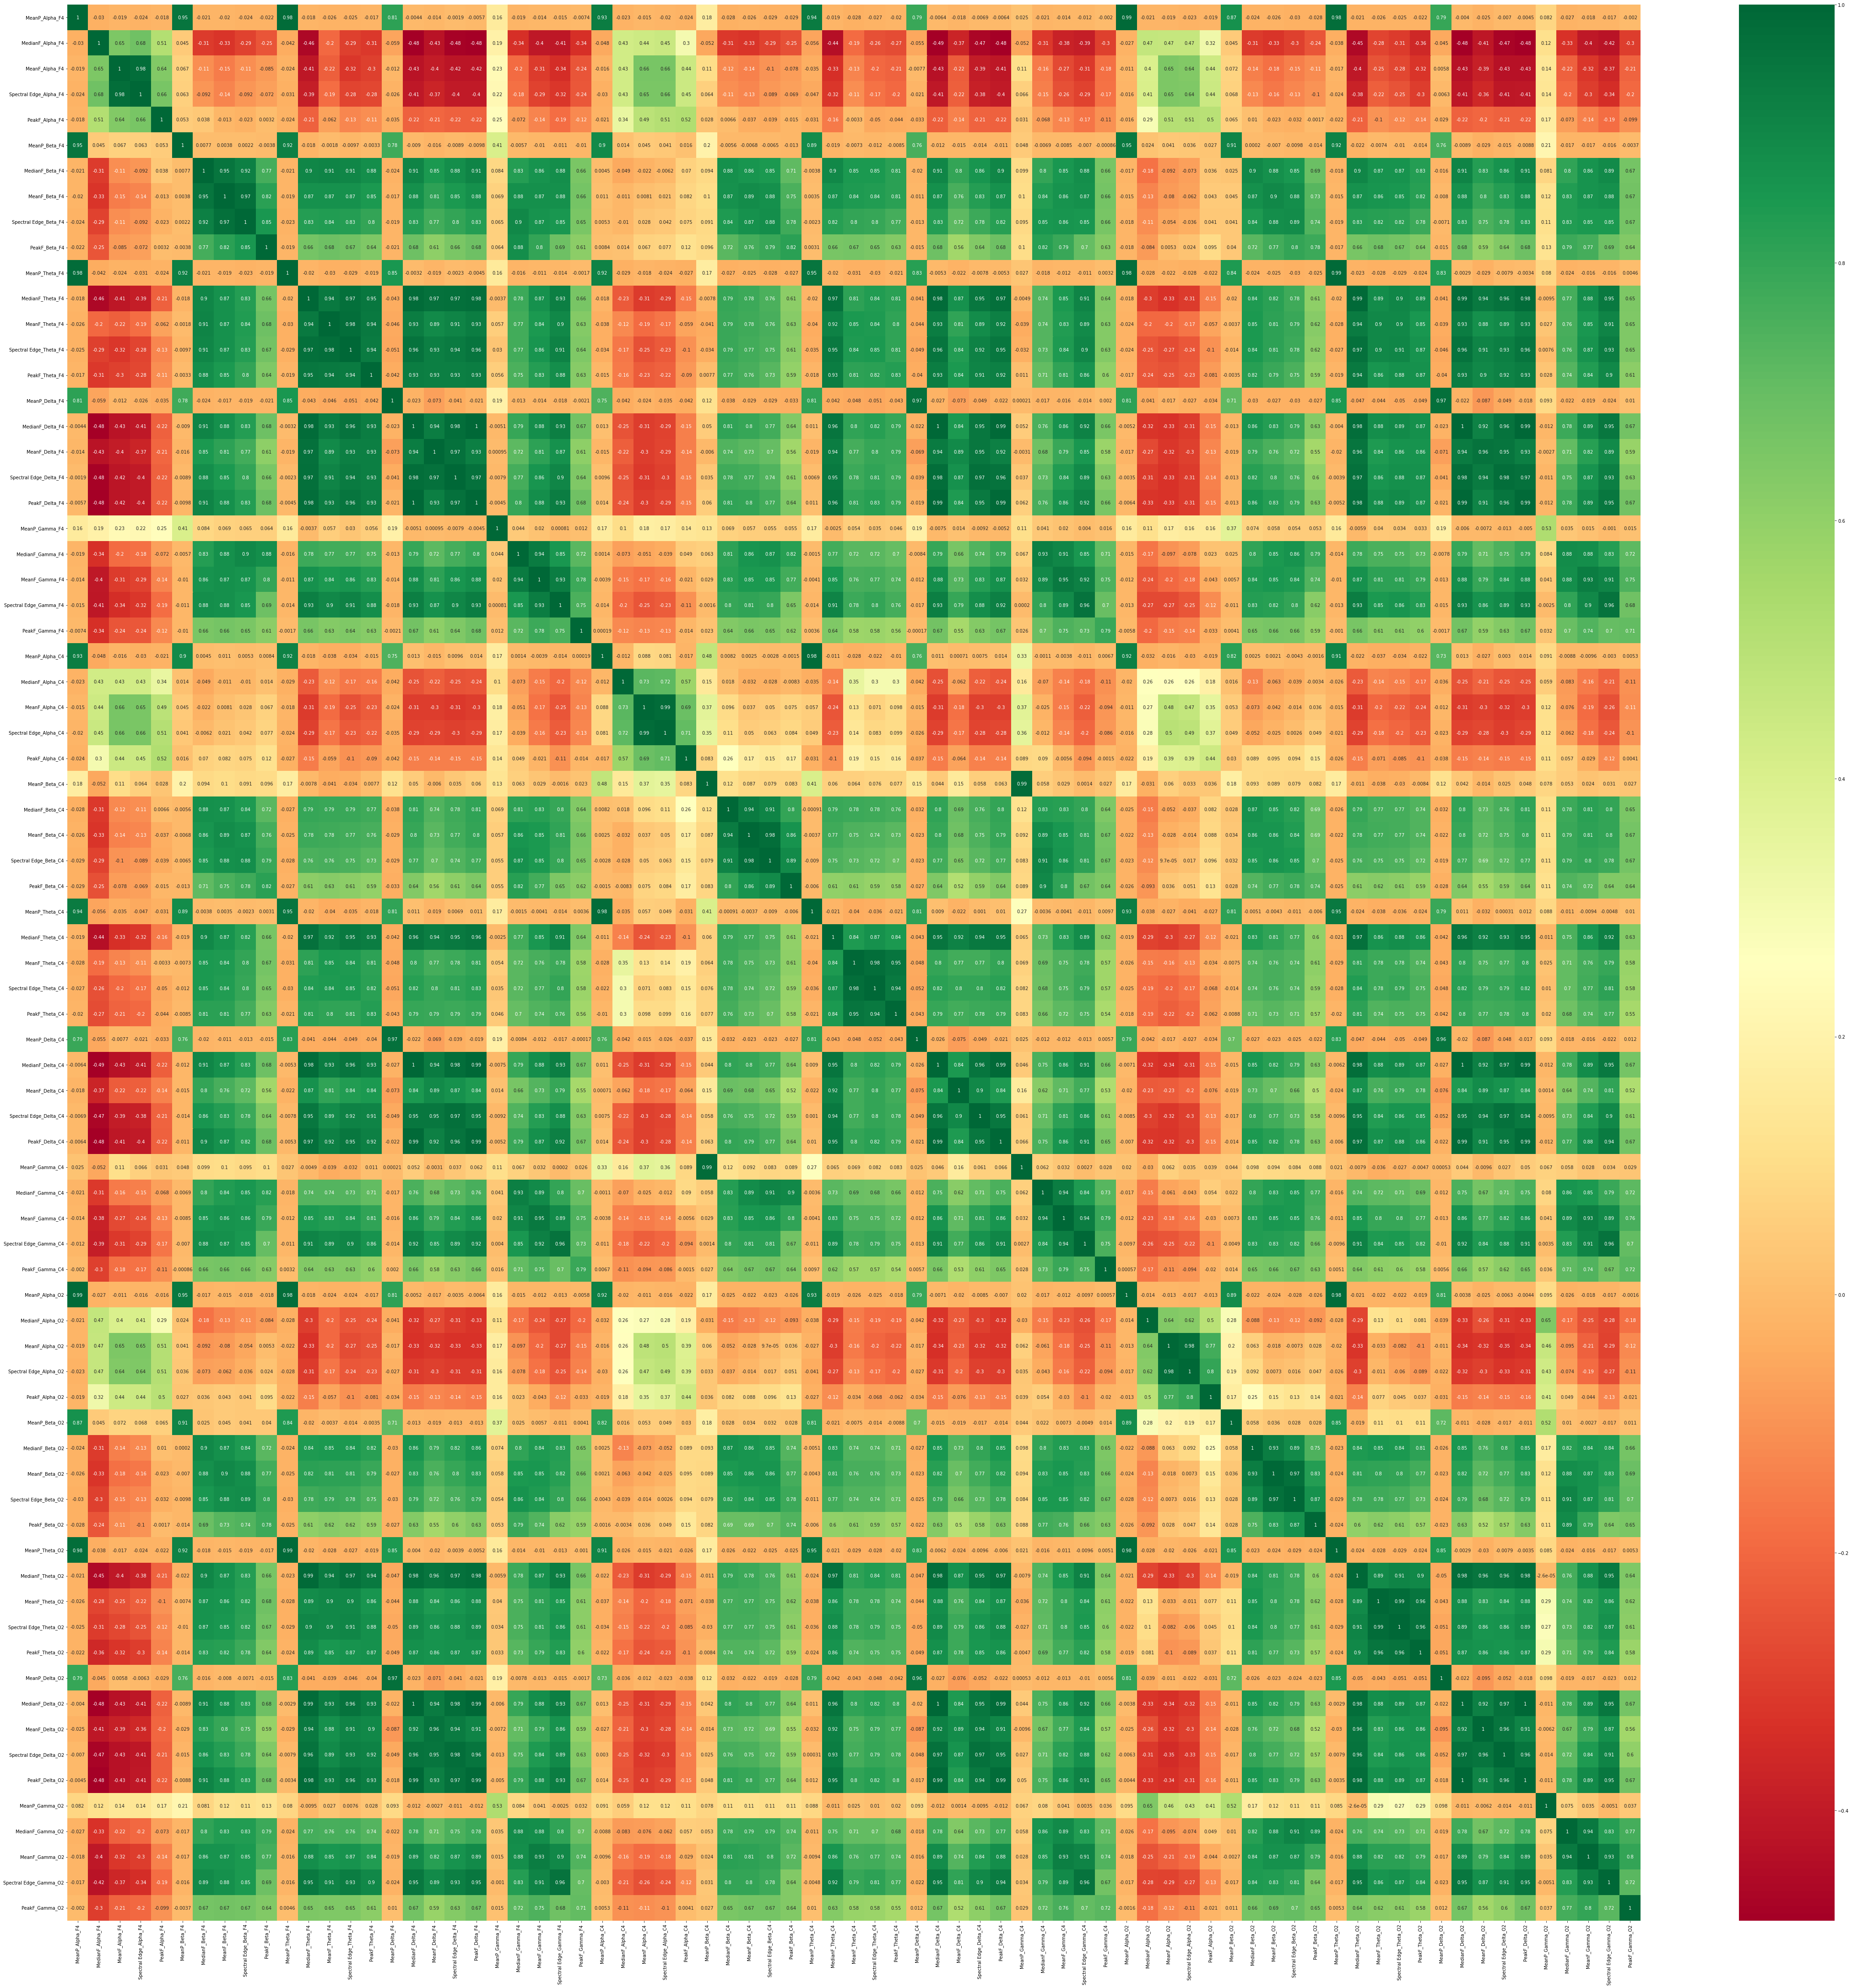

In [21]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(77,77))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

corr() is from panda and works on:
Method of correlation:

pearson : standard correlation coefficient

kendall : Kendall Tau correlation coefficient

spearman : Spearman rank correlation